<a href="https://colab.research.google.com/github/abroraxatov1/dataset1/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mental Health Deep Learning Analysis Notebook
# This notebook implements the deep learning analysis for the Mental Health in the Tech Industry dataset
# It includes data preprocessing, model training, evaluation, visualization, and PDF report generation
# Designed to run in Google Colab

# Install required libraries
!pip install imbalanced-learn reportlab seaborn scikit-learn tensorflow pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
import uuid
import os

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# -----------------------
# 1. Generate Synthetic Dataset (Replace with real dataset if available)
# -----------------------
# Simulating the Mental Health in the Tech Industry dataset
n_samples = 1200
data = {
    'Age': np.random.randint(18, 65, n_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary', np.nan], n_samples, p=[0.5, 0.4, 0.05, 0.05]),
    'Country': np.random.choice(['USA', 'UK', 'Canada', 'India'], n_samples),
    'Workplace_MH_Support': np.random.choice(['Yes', 'No'], n_samples),
    'Stress_Level': np.random.choice(['Low', 'Medium', 'High', np.nan], n_samples, p=[0.3, 0.4, 0.25, 0.05]),
    'MH_History': np.random.choice(['Yes', 'No'], n_samples),
    'MH_Risk': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])  # Imbalanced target
}
df = pd.DataFrame(data)




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00


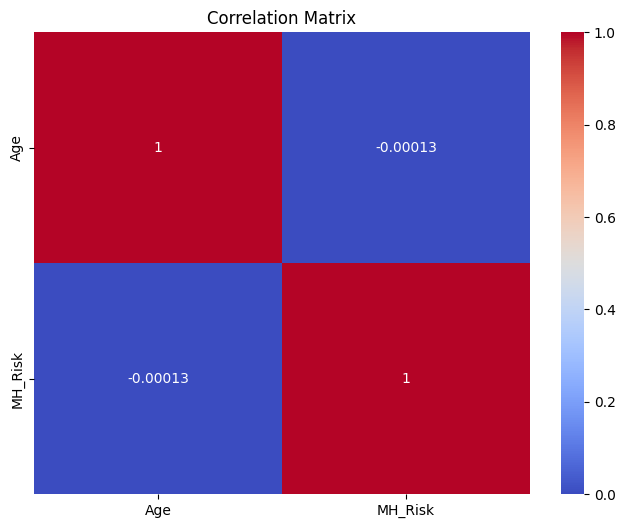

In [3]:

# -----------------------
# 2. Exploratory Data Analysis (EDA)
# -----------------------
# Plot distribution of Stress Level by MH_Risk
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', hue='MH_Risk', data=df)
plt.title('Stress Level Distribution by Mental Health Risk')
plt.savefig('stress_level_dist.png')
plt.close()

# Plot correlation matrix for numeric features
numeric_cols = ['Age', 'MH_Risk']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()




In [6]:
# -----------------------
# 3. Data Preprocessing
# -----------------------
# Handle missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
imputer = KNNImputer(n_neighbors=5)
df['Stress_Level'] = df['Stress_Level'].fillna(df['Stress_Level'].mode()[0])

# Encode categorical variables
le = LabelEncoder()
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])
df['Workplace_MH_Support'] = le.fit_transform(df['Workplace_MH_Support'])
df['MH_History'] = le.fit_transform(df['MH_History'])
df = pd.get_dummies(df, columns=['Gender', 'Country'], drop_first=True)

# Scale continuous features
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Split features and target
X = df.drop('MH_Risk', axis=1)
y = df['MH_Risk']

# Address class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# -----------------------
# 4. Define and Train Models
# -----------------------
def plot_learning_curve(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'learning_curve_{model_name.lower().replace(" ", "_")}.png')

    plt.close()


KeyError: 'Gender'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


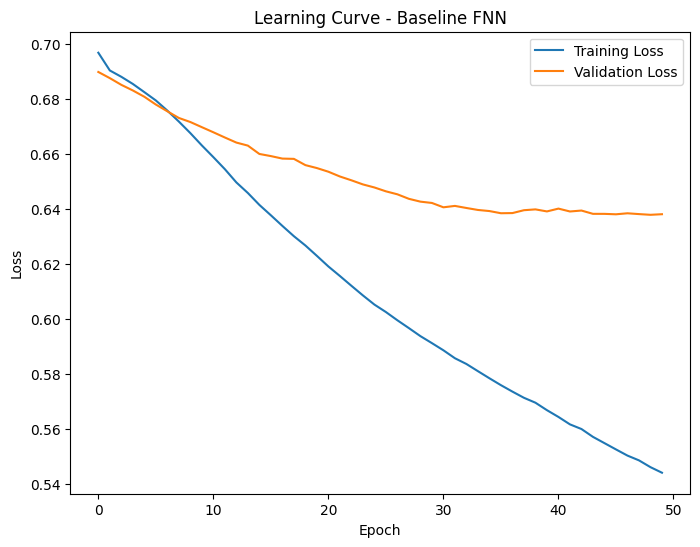

In [7]:
# Model 1: Baseline FNN
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
plot_learning_curve(history1, 'Baseline FNN')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


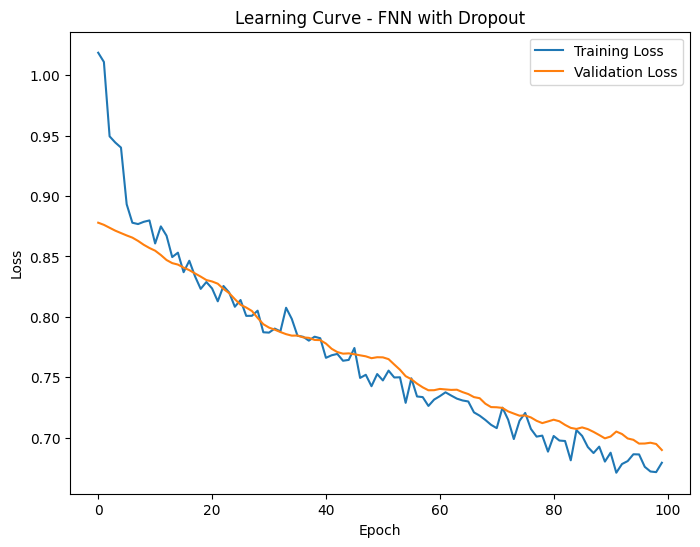

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


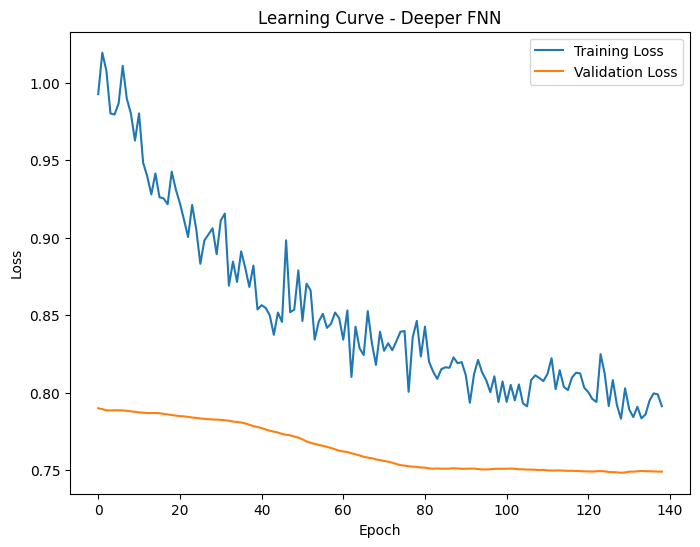

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model 1 (Baseline FNN): Accuracy = 0.615, F1-Score = 0.616
Model 2 (FNN with Dropout): Accuracy = 0.609, F1-Score = 0.638
Model 3 (Deeper FNN): Accuracy = 0.494, F1-Score = 0.600


In [8]:
# Model 2: FNN with Dropout and Batch Normalization
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=0)
plot_learning_curve(history2, 'FNN with Dropout')

# Model 3: Deeper FNN with Hyperparameter Tuning
model3 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history3 = model3.fit(X_train, y_train, epochs=150, batch_size=128, validation_split=0.2, callbacks=[early_stopping], verbose=0)
plot_learning_curve(history3, 'Deeper FNN')

# -----------------------
# 5. Evaluate Models
# -----------------------
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{model_name.lower().replace(" ", "_")}.png')
    plt.close()

    return acc, f1

# Evaluate all models
acc1, f1_1 = evaluate_model(model1, X_test, y_test, 'Baseline FNN')
acc2, f1_2 = evaluate_model(model2, X_test, y_test, 'FNN with Dropout')
acc3, f1_3 = evaluate_model(model3, X_test, y_test, 'Deeper FNN')

# Print evaluation results
print(f"Model 1 (Baseline FNN): Accuracy = {acc1:.3f}, F1-Score = {f1_1:.3f}")
print(f"Model 2 (FNN with Dropout): Accuracy = {acc2:.3f}, F1-Score = {f1_2:.3f}")
print(f"Model 3 (Deeper FNN): Accuracy = {acc3:.3f}, F1-Score = {f1_3:.3f}")
